In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as s
import matplotlib.patches as mpatches
import math
import csv
import os

In [2]:
# import win32com.client
# dssObj = win32com.client.Dispatch('OpenDSSEngine.DSS')
# DSSText = dssObj.Text
# DSSCircuit = dssObj.ActiveCircuit
# DSSSolution = DSSCircuit.Solution
# DSSElem = DSSCircuit.ActiveCktElement

In [3]:
# DSSText.Command = "CD c:\\Users\\william.brach\\Developer\\creating-microgrid-dataset\\opendss"

In [4]:
# DSSText.Command = "Compile 'microgrid.dss'"

In [5]:
#DSSText.Command='Plot Loadshape Object=officeLoad'
#DSSText.Command='Plot Loadshape Object=industrialParkLoad'
#DSSText.Command='Plot Loadshape Object=shopsLoad'

# DSSText.Command='Plot Loadshape Object=mveLoad'
# DSSText.Command='Plot Loadshape Object=fveLoad'
# DSSText.Command='Plot Loadshape Object=wpgLoad'


## Batery

In [6]:
# DSSText.Command= 'new storage.baterry bus=701 kV=0.4 Phases=3 kwRated=2000 kWhrated=50000 kWhstored=2000 vminpu=0.80 vmaxpu=1.20  %reserve=1  %effcharge=100   %effdischarge=100   %IdlingkW=0   enabled=yes';  
# DSSText.Command= 'new StorageController.scbattery element=Line.L1  Terminal=1 Elementlist=[baterry]  modedischarge=Peakshave kWTarget=20 modeCharge=PeakShaveLow kWTargetlow=0   InhibitTime=1';


## Monitors

In [7]:
# # load monitors
# DSSText.Command= 'New Monitor.metoffice  element=Load.officeBuilding  ppolar=no mode=65';
# DSSText.Command= 'New Monitor.metshops  element=Load.shops  ppolar=no mode=65';
# DSSText.Command= 'New Monitor.metpark element=Load.industrialPark  ppolar=no mode=65';
# DSSText.Command= 'New Monitor.trafo  element=Line.L1  ppolar=no mode=65';
# # batery monitor
# # DSSText.Command= 'New Monitor.baterry  element=storage.baterry   mode=3';


## Solution Settings

In [8]:
# # # DSSSolution.MaxControlIterations=1000;
# # # DSSSolution.maxiterations=1000;
# DSSText.Command = 'Set controlmode=time' ;
# DSSText.Command = 'Set mode=daily ';
# DSSText.Command = 'Set stepsize=15m';
# DSSText.Command = 'Set number=19968';
# # #Originalsteps=DSSSolution.Number
# # #Originalsteps

In [9]:
# DSSSolution.Solve();

## Plots

In [10]:
# #DSSText.Command = 'Plot monitor object=metoffice';
# #DSSText.Command = 'Plot monitor object=metshops';
# #DSSText.Command = 'Plot monitor object=metpark';
#DSSText.Command = 'Plot monitor object=trafo';

# #DSSText.Command = 'Export monitor object=metoffice';
# # DSSText.Command = 'Export monitor object=baterry';

In [11]:
# DSSText.Command = 'Plot monitor object=baterry channels=(2,3,4)';
# DSSText.Command = 'Plot monitor object=baterry channels=(1)';

In [12]:
import opendssdirect as dss
from opendssdirect.utils import run_command
import types

import inspect

In [13]:
grid = run_command('Redirect  c:\\Users\\william.brach\\Developer\\creating-microgrid-dataset\\opendss');

In [14]:
run_command("Compile 'microgrid.dss'")

''

# LOADS

In [15]:
# Loads
LOADS_ENABLED='Yes'
dss.run_command('New Load.{name} Bus1={bus} Phases=3 Conn=wye Model=1 kV=0.4  pf=0.98  daily={daily} Vminpu=0.5 Vmaxpu=3 enabled={enabled}'.format(
    name='officeBuilding',
    bus='712',
    daily='officeLoad',
    enabled=LOADS_ENABLED
))
dss.run_command('New Load.{name} Bus1={bus} Phases=3 Conn=wye Model=1 kV=0.4  pf=0.98  daily={daily} Vminpu=0.5 Vmaxpu=3 enabled={enabled}'.format(
    name='industrialPark',
    bus='705',
    daily='industrialParkLoad',
    enabled=LOADS_ENABLED
))
dss.run_command('New Load.{name} Bus1={bus} Phases=3 Conn=wye Model=1 kV=0.4  pf=0.98  daily={daily} Vminpu=0.5 Vmaxpu=3 enabled={enabled}'.format(
    name='shops',
    bus='713',
    daily='shopsLoad',
    enabled=LOADS_ENABLED
))

''

# GENERATORS

In [16]:
GENERATORS_ENABLED='Yes'
dss.run_command('New Generator.{name} Bus1={bus} Phases=3 Conn=wye Model=1 kV=0.4  pf=0.98 kw={kw} daily={daily} Vminpu=0.5 Vmaxpu=3 enabled={enabled}'.format(
    name='fve',
    bus='705',
    daily='fveLoad',
    enabled=GENERATORS_ENABLED,
    kw=0.02
))
dss.run_command('New Generator.{name} Bus1={bus} Phases=3 Conn=wye Model=1 kV=0.4  pf=0.98 kw={kw} daily={daily} Vminpu=0.5 Vmaxpu=3 enabled={enabled}'.format(
    name='mve',
    bus='701',
    daily='mveLoad',
    enabled=GENERATORS_ENABLED,
    kw=0.06
))
dss.run_command('New Generator.{name} Bus1={bus} Phases=3 Conn=wye Model=1 kV=0.4  pf=0.98 kw={kw} daily={daily} Vminpu=0.5 Vmaxpu=3 enabled={enabled}'.format(
    name='wpg',
    bus='714',
    daily='wpgLoad',
    enabled=GENERATORS_ENABLED,
    kw=0.06
))

''

# BATERY

In [17]:
dss.run_command('new storage.baterry bus=701 kV=0.4 Phases=3 kwRated=50 kWhrated=200 kWhstored=50 vminpu=0.80 vmaxpu=1.20  %reserve=1  %effcharge=100   %effdischarge=100   %IdlingkW=0   enabled=yes')
dss.run_command('new StorageController.scbattery element=Line.L1  Terminal=1 Elementlist=[baterry]  modedischarge=Peakshave kWTarget=20 modeCharge=PeakShaveLow kWTargetlow=0   InhibitTime=1')

''

# MONITORS

In [18]:
# load monitors
#New Monitor.metoffice  element=Load.officeBuilding  ppolar=no mode=65
# dss.run_command('New Monitor.{name}  element=Load.{elementname}  ppolar=no mode=65 enabled={enabled}'.format(
#     name='metoffice',
#     elementname='officeBuilding',
#     enabled='Yes'
# ))
# dss.run_command('New Monitor.{name}  element=Load.{elementname}  ppolar=no mode=65 enabled={enabled}'.format(
#     name='metshops',
#     elementname='shops',
#     enabled='Yes'
# ))
# dss.run_command('New Monitor.{name}  element=Load.{elementname}  ppolar=no mode=65 enabled={enabled}'.format(
#     name='metpark',
#     elementname='industrialPark',
#     enabled='Yes'
# ))
dss.run_command('New Monitor.{name}  element=Line.{elementname}  ppolar=no mode=65 enabled={enabled}'.format(
    name='trafo',
    elementname='L1',
    enabled='Yes'
))
dss.run_command('New Monitor.baterry  element=storage.baterry   mode=3')

''

In [19]:
dss.run_command('Set controlmode=time')
dss.run_command('Set mode=daily ')
dss.run_command('Set stepsize=15m')
dss.run_command('Set number=2880')

''

In [20]:
dss.run_command('Solve');

In [21]:
x = dss.run_command('Export monitor object=trafo')
batery = dss.run_command('Export monitor object=baterry')

In [22]:
batery

'C:\\Users\\william.brach\\Developer\\creating-microgrid-dataset\\opendss\\baterka_Mon_baterry.csv'

In [23]:
df = pd.read_csv(x)
batery = pd.read_csv(batery)

In [24]:
df.columns

Index(['hour', ' t(sec)', ' P1 (kW)', ' Q1 (kvar)'], dtype='object')

In [25]:
priceDf = pd.read_csv("price.csv",delimiter=';')
price = priceDf[priceDf['Delivery day'] == '2.4.2021']['Price (€/MWh)']
price = price.append(price)
price = price.append(price)
price = price.sort_index().reset_index().drop(columns={'index'})['Price (€/MWh)']

In [26]:
# from matplotlib import cm
# ax = plt.plot(range(0,96),kw.T,alpha=0.1,color="red")
# #ax = plt.plot(range(0,96),kwGenerator.T,alpha=0.1,color="green")

In [27]:
kw = df[' P1 (kW)'][2*96:(2+1)*96]
b = batery['kWOut'][2*96:(2+1)*96]
b.index = range(0,96)
kw.index = range(0,96)
plus = kw[kw > 0]
minus = kw[kw <= 0].multiply(-1)
b = b.multiply(-1)

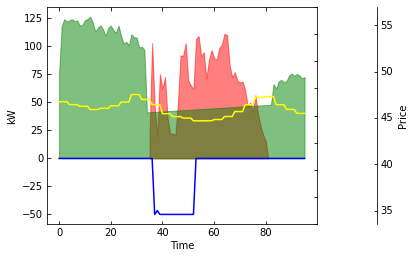

In [28]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt

host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

offset = 60
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right", axes=par2,
                                        offset=(offset, 0))

par2.axis["right"].toggle(all=True)

# host.set_xlim(-5, 100)
# host.set_ylim(-150, 120)

host.set_xlabel("Time")
host.set_ylabel("kW")
par1.set_ylabel("Temperature")
par2.set_ylabel("Price")


p1 = plt.fill_between(plus.index,plus, 0, alpha=0.5, color='red')
p2 = plt.fill_between(minus.index,minus, 0, alpha=0.5, color='green')
p3 = plt.plot(price,color='yellow')
p4 = plt.plot(b,color="blue")
par1.set_ylim(0, 4)
par2.set_ylim(min(price), max(price))


plt.draw()
plt.savefig('production_comsuption_batery_prod.png')
plt.show()


In [29]:
df = dss.utils.lines_to_dataframe()

def create_graph(phase=1):
    G = nx.Graph()

    data = df[['Bus1', 'Bus2']].to_dict(orient="index")

    for name in data:
        line = data[name]
        if f".{phase}" in line["Bus1"] and f".{phase}" in line["Bus2"]:
            G.add_edge(line["Bus1"].split(".")[0], line["Bus2"].split(".")[0])

    pos = {}
    for name in dss.Circuit.AllBusNames():
        dss.Circuit.SetActiveBus(f"{name}")
        if phase in dss.Bus.Nodes():
            index = dss.Bus.Nodes().index(phase)
            re, im = dss.Bus.PuVoltage()[index:index+2]
            V = abs(complex(re, im))
            D = dss.Bus.Distance()

            pos[dss.Bus.Name()] = (D, V)

    return G, pos


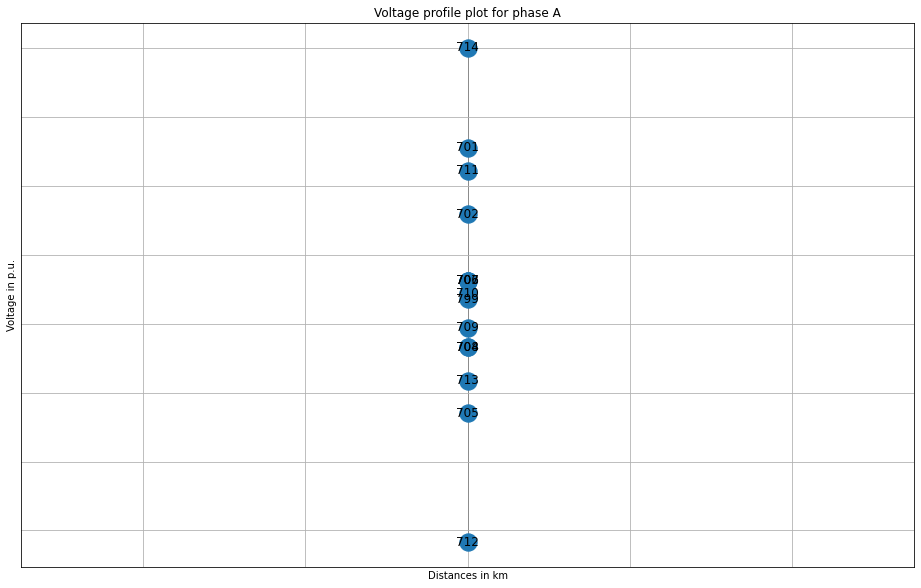

In [30]:
import networkx as nx
fig, axs = plt.subplots(1, 1, figsize=(16, 10))
#https://dss-extensions.org/OpenDSSDirect.py/notebooks/VoltageProfilePlot.html?highlight=plot
#https://dss-extensions.org/OpenDSSDirect.py/opendssdirect.html?highlight=maxiterations#module-opendssdirect.utils
#https://dss-extensions.org/OpenDSSDirect.py/notebooks/GettingStarted.html
ax = axs
G, pos = create_graph(phase=1)
nx.draw_networkx_nodes(G, pos, ax=ax, labels={x: x for x in G.nodes()})
nx.draw_networkx_labels(G, pos, ax=ax, labels={x: x for x in G.nodes()})
nx.draw_networkx_edges(G, pos, ax=ax, labels={x: x for x in G.nodes()})

ax.grid()
ax.set_ylabel("Voltage in p.u.")
ax.set_xlabel("Distances in km")
ax.set_title("Voltage profile plot for phase A");